# P04 Practice02 Search & Maximum

**for-loop + if-else: conditional operators**

<div style="border:2px solid gray; padding:5px; background-color:#F8F8F8">

* **Counting**: <br>把所有文字看過一遍，計算文字的出現次數。讀取一個文字字符串，使用for迴圈和if條件語句來計算每個字元或單詞出現的次數。例子: "apple" 中，'p'出現了2次。
* **Filtering**: <br>透過for迴圈和if條件語句來選擇並顯示特定的youbike站台，例如只顯示滿載的站台。例子: 從10個站台中找出滿載的站台。
* **Detecting prominants**: <br>透過比較來找到最大值和最小值
    - Top value: 找出數字列表中的最大值。例子: [3, 9, 2] 中，最大值是9。
    - Top site：從youbike站台列表中找出擁有最高評分或最多使用者的站台。例子: "站台A", "站台B", "站台C" 中，"站台B" 最熱門。
    - Top 3 sites：找出前三個最熱門的站台。
* **Conditional Replacing**: <br>使用if條件語句來檢測AQX數據中的缺失值，並規定當缺失值出現時如何進行替換或處理。也可用於檢查輸入日期的合法性。例子: 如果AQI值為NaN，則替換為平均AQI值。
* **Sorting**: <br>使用`for`迴圈來遍歷AQI數據，然後找出具有最高AQI或者前三高AQI的站台。
例子: 從10個AQI值中找出最大的或前三大的。
* **Rescaling**: <br>透過一個標準的映射表，將AQI數值轉換為五個等級：非常高、高、中、低、非常低，以便使用者更容易理解。例子: AQI 67轉換為"高"等級。

</div>

## 空氣品質指數（AQX）案例研究

**簡介與資料來源**

這個案例研究旨在分析來自行政院環保署的即時空氣品質數據。這些數據可以在[行政院環保署的空氣品質監測網站](https://taqm.epa.gov.tw/taqm/tw/default.aspx)上查詢，並會按照AQI值用不同顏色代表其嚴重程度。更即時的數據也可在行政院環保署的[開放資料平台](https://opendata.epa.gov.tw/api/v1/AQI?%24skip=0&%24top=1000&%24format=json)找到。

**分析策略**

對於空氣品質或相似數據（如水污染、噪音、紫外線）的分析，以下是幾個主要的分析方向：

1. **識別突出的數據點**：找出AQI值最高（最嚴重）的地區。如果有多個地區同樣嚴重，那麼所有這些地區都應該被列出。這涉及到遍歷所有的數據，並透過比較大小找出最高的AQI值。
2. **排序與篩選**：除了找出最嚴重的地區，我們也可能對前三、前五或前10%的地區感興趣。這通常需要對數據進行排序。
3. **數據摘要**：計算各種統計量，例如平均值、四分位數，以及數據的分佈型態（如常態分佈或幂律分佈）。
4. **描述數據分佈**：了解不同等級的空氣品質在各測站中的分佈情況。這通常涉及到「分類」和「計數」的基本操作。
5. **目標觀察與比較**：例如，對比大都市和非大都市的空氣品質，特別是PM2.5或O3等指標。

**重要性與溝通**

為何需要這樣的分析？主要是為了將複雜的數據以容易理解的方式傳達給大眾。儘管數據分析主要是由專家進行，但其目的通常是為了解釋或傳達某種特定信息給一般人。為了做到這一點，使用簡單明瞭的語言是關鍵——例如，「大部分地區」、「最嚴重地區」或「前幾名」等。有了數據和統計支持，我們就可以更自信地，也更準確地傳達這些信息。

### Load AQX data

1. 本案例所使用的資料仍然是網頁上json格式的資料，因此，仍需要用`requests`函式庫將其取回，再用`json()`將json格式的文字解析為Python的dict與list。
2. 原始網頁為https://airtw.moenv.gov.tw/cht/EnvMonitoring/Central/CentralMonitoring.aspx。
3. json資料網址為https://airtw.epa.gov.tw/gis_ajax.aspx?Type=GetAQInfo&Layer=EPA&QueryTime=2023/09/17%2011:00，其中QueryTime為查詢的時間，格式為YYYY/MM/DD HH:MM，例如2023/09/17 11:00。需要改為合理且近日的日期。


In [25]:
import requests
import json
url = "https://airtw.epa.gov.tw/gis_ajax.aspx?Type=GetAQInfo&Layer=EPA&QueryTime=2023/09/17%2011:00"
aqdata = requests.get(url).json()


### Traverse AQI content

既然傳回來的資料看起來是個list of dict的結構，外層為一個list，不失一般性地取index為0的第一筆資料來觀察。
* **法則一：如果偵測出他是一個list**，那就取出第0筆資料往下追蹤。
* **法則二：如果偵測出他是一個dict**，就用`dict.keys()`將其所有的key給列印出來，然後挑你所需要的key往下追蹤。但如果`.keys()`印出來的結果是類似流水號的id（e.g., youbike data），那就代表設計者把id對應到該id的資料。此時，也是不失一般性，取第一個id作為索引來往下存取即可。

In [15]:
# print the data type


# Print the content of the first data entry


{'SiteID': '1',
 'SiteName': '二林',
 'AQI': '66',
 'ViewName': '二林',
 'AreaName': '中部空品區',
 'AreaID': '3',
 'COUNTY_Eng': 'Changhua',
 'POLLUTANT': '細懸浮微粒',
 'SiteAddres': '彰化縣二林鎮萬合里江山巷1號',
 'TWD97_Lon': 120.409653,
 'TWD97_Lat': 23.925175,
 'SiteType': '一般站',
 'SiteType2': '中央政府',
 'siteowner': '行政院環境保護署'}

In [2]:
# Print the length of the data

# Print all keys of one data entry


### Print and observe each data entry
列印出相關資料來做觀察，包含AQI、POLLUTANT（污染物種類）。如果資料筆數過多不易觀察的話，應該用List Slicing取出前數筆（例如`alist[:10]`）或後數筆（例如`alist[-3:]`）來觀察

```
二林	79	細懸浮微粒
三重	58	細懸浮微粒
三義	57	細懸浮微粒
土城	51	懸浮微粒
士林	57	細懸浮微粒
```


In [1]:
# Print AQI and POLLUTANT of each site
# for site in aqdata:
#     print("{}\t{}\t{}".format(site['SiteName'], site['AQI'], site['POLLUTANT']))
    
# Print AQI and POLLUTANT of the first 10 sites


### `range()` to traverse list by index

1. 因為`aqdata`是一個list，也可以透過index去access`aqdata`中第0個、第1個、第2個dict的內容。<br>但此時你就要去用index存取`aqdata`內的值，你的程式碼會稍微長一點點。
2. `range(n)`函式，相當於`range(0, n)`，可以產生`0`至`n-1`的list。<br>用`list()`轉換後（例如`list(range(10))`)便會顯示出其內容。
3. `range(s, t)`表從`s`至`t-1`。
4. `range(s, t, u)`表示從`s`至`t-1`，每間隔`u`，如果`u`等於2的話，就等於隔一個數字。所以`range(3, 10, 2)`會是`[3, 5, 7, 9]`。

Question: 什麼時候會用到？取樣的時候，例如多加一個if判斷式，來取出偶數位置的樣本。

In [32]:
print(list(range(10)))
print(list(range(0, 10)))
print(list(range(1, 10)))
print(list(range(1, 10, 2)))
for i in range(1, 10, 2):
    print(i)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 3, 5, 7, 9]
1
3
5
7
9


而`aqdata`這個list的長度為`len(aqdataa)`，其list index從0至`len(aqdataa)`，所以使用`for i in range(len(aqdata)):`可以走訪整個list的內容。（註：以下的例子只列印出前10個）

0 二林 66 細懸浮微粒
1 三重 28 
2 三義 36 
3 土城 13 
4 士林 20 
5 大同 39 
6 大里 57 細懸浮微粒
7 大園 23 
8 大寮 84 細懸浮微粒
9 小港 76 細懸浮微粒
10 中山 18 
11 中壢 20 
12 仁武 78 細懸浮微粒
13 斗六 57 細懸浮微粒
14 冬山 13 
15 古亭 14 
16 左營 65 細懸浮微粒
17 平鎮 15 
18 永和 19 
19 安南 62 細懸浮微粒
20 朴子 67 細懸浮微粒
21 汐止 13 
22 竹山 43 
23 竹東 29 
24 西屯 59 細懸浮微粒
25 沙鹿 43 
26 宜蘭 13 
27 忠明 54 細懸浮微粒
28 松山 14 
29 板橋 22 
30 林口 13 
31 林園 68 細懸浮微粒
32 花蓮 16 
33 金門 47 
34 前金 67 細懸浮微粒
35 前鎮 65 細懸浮微粒
36 南投 62 細懸浮微粒
37 屏東 79 細懸浮微粒
38 恆春 10 
39 美濃 67 細懸浮微粒
40 苗栗 21 
41 埔里 43 
42 桃園 19 
43 馬公 36 
44 馬祖 71 臭氧八小時
45 基隆 17 
46 崙背 61 細懸浮微粒
47 淡水 17 
48 麥寮 54 細懸浮微粒
49 善化 67 細懸浮微粒
50 復興 61 細懸浮微粒
51 湖口 30 
52 菜寮 20 
53 陽明 18 
54 新竹 19 
55 新店 12 
56 新莊 21 
57 新港 71 細懸浮微粒
58 新營 60 細懸浮微粒
59 楠梓 70 細懸浮微粒
60 萬里 29 
61 萬華 12 
62 嘉義 71 細懸浮微粒
63 彰化 58 細懸浮微粒
64 臺西 62 細懸浮微粒
65 臺東 9 
66 臺南 66 細懸浮微粒
67 鳳山 73 細懸浮微粒
68 潮州 63 細懸浮微粒
69 線西 48 
70 橋頭 71 細懸浮微粒
71 頭份 13 
72 龍潭 13 
73 豐原 52 細懸浮微粒
74 關山 7 
75 觀音 54 細懸浮微粒
76 彰化(員林) 65 細懸浮微粒
77 高雄(湖內) 77 細懸浮微粒
78 臺南(麻豆) 58 細懸浮微粒
79 屏東(琉球) -1 
80 桃園(三民) 1

### `enumerate()` to access index and item simultaneously

前面我們介紹到兩個版本，
1. `for site in aqdata["Data"]:`是用`site`作為臨時變數以在for-loop中存取所有的資料項目。
2. `for i in range(len(aqdata["Data"])):`的做法則是用`i`作為index來存取原本的`aqdata["Data"]`。

但其實還有第三種選擇就是用`enumerate()`來同時存取index和資料項目。<br>
當需要存取這是第幾個項目時，那我就用index，但我如果只是要判斷一下大小，那我就可以用被取出來的資料項目。<br>寫法如下：
```python
for i, site in enumerate(aqdata):`
```

In [40]:
print(type(enumerate(aqdata)))







<class 'enumerate'>
0 二林 66 細懸浮微粒
1 三重 28 
2 三義 36 
3 土城 13 
4 士林 20 
5 大同 39 
6 大里 57 細懸浮微粒
7 大園 23 
8 大寮 84 細懸浮微粒
9 小港 76 細懸浮微粒
10 中山 18 
11 中壢 20 
12 仁武 78 細懸浮微粒
13 斗六 57 細懸浮微粒
14 冬山 13 
15 古亭 14 
16 左營 65 細懸浮微粒
17 平鎮 15 
18 永和 19 
19 安南 62 細懸浮微粒
20 朴子 67 細懸浮微粒
21 汐止 13 
22 竹山 43 
23 竹東 29 
24 西屯 59 細懸浮微粒
25 沙鹿 43 
26 宜蘭 13 
27 忠明 54 細懸浮微粒
28 松山 14 
29 板橋 22 
30 林口 13 
31 林園 68 細懸浮微粒
32 花蓮 16 
33 金門 47 
34 前金 67 細懸浮微粒
35 前鎮 65 細懸浮微粒
36 南投 62 細懸浮微粒
37 屏東 79 細懸浮微粒
38 恆春 10 
39 美濃 67 細懸浮微粒
40 苗栗 21 
41 埔里 43 
42 桃園 19 
43 馬公 36 
44 馬祖 71 臭氧八小時
45 基隆 17 
46 崙背 61 細懸浮微粒
47 淡水 17 
48 麥寮 54 細懸浮微粒
49 善化 67 細懸浮微粒
50 復興 61 細懸浮微粒
51 湖口 30 
52 菜寮 20 
53 陽明 18 
54 新竹 19 
55 新店 12 
56 新莊 21 
57 新港 71 細懸浮微粒
58 新營 60 細懸浮微粒
59 楠梓 70 細懸浮微粒
60 萬里 29 
61 萬華 12 
62 嘉義 71 細懸浮微粒
63 彰化 58 細懸浮微粒
64 臺西 62 細懸浮微粒
65 臺東 9 
66 臺南 66 細懸浮微粒
67 鳳山 73 細懸浮微粒
68 潮州 63 細懸浮微粒
69 線西 48 
70 橋頭 71 細懸浮微粒
71 頭份 13 
72 龍潭 13 
73 豐原 52 細懸浮微粒
74 關山 7 
75 觀音 54 細懸浮微粒
76 彰化(員林) 65 細懸浮微粒
77 高雄(湖內) 77 細懸浮微粒
78 臺南(麻豆) 58 細懸浮微粒
79 屏東

## Prepare data for search and query

顯然AQI資料是一個非常標準的JSON格式，轉換為Python的資料型態就會變成list of dict。<br>
但我希望可以用空品站名稱來查詢空品站的指標，要怎麼做呢？有兩種方法：<br>
1. 我可以用for-loop把所有資料跑一遍，如果等於該空品站名稱的話，那就列印出來。
2. 我想要建立一個新的`aqdict`，希望可以用`aqdict["三重"]`就直接列印出`三重`的資料。

### Method 01. Search with for-loop

就把所有資料用for-loop走訪一遍，如果站台名稱等於所欲查詢的站台的話，那就把他列印出來。

In [43]:
query = "三重"





{'SiteID': '2', 'SiteName': '三重', 'AQI': '28', 'ViewName': '三重', 'AreaName': '北部空品區', 'AreaID': '1', 'COUNTY_Eng': 'Newtaipei', 'POLLUTANT': '', 'SiteAddres': '新北市三重區三和路重陽路交口', 'TWD97_Lon': 121.493806, 'TWD97_Lat': 25.072611, 'SiteType': '交通站', 'SiteType2': '中央政府', 'siteowner': '行政院環境保護署'}


In [44]:
queries = ["三重", "萬里", "萬華"]





{'SiteID': '2', 'SiteName': '三重', 'AQI': '28', 'ViewName': '三重', 'AreaName': '北部空品區', 'AreaID': '1', 'COUNTY_Eng': 'Newtaipei', 'POLLUTANT': '', 'SiteAddres': '新北市三重區三和路重陽路交口', 'TWD97_Lon': 121.493806, 'TWD97_Lat': 25.072611, 'SiteType': '交通站', 'SiteType2': '中央政府', 'siteowner': '行政院環境保護署'}
{'SiteID': '61', 'SiteName': '萬里', 'AQI': '29', 'ViewName': '萬里', 'AreaName': '北部空品區', 'AreaID': '1', 'COUNTY_Eng': 'Newtaipei', 'POLLUTANT': '', 'SiteAddres': '新北市萬里區瑪鋉路221號', 'TWD97_Lon': 121.689881, 'TWD97_Lat': 25.179667, 'SiteType': '一般站', 'SiteType2': '中央政府', 'siteowner': '行政院環境保護署'}
{'SiteID': '62', 'SiteName': '萬華', 'AQI': '12', 'ViewName': '萬華', 'AreaName': '北部空品區', 'AreaID': '1', 'COUNTY_Eng': 'Taipei', 'POLLUTANT': '', 'SiteAddres': '臺北市萬華區中華路1段66號', 'TWD97_Lon': 121.507972, 'TWD97_Lat': 25.046503, 'SiteType': '一般站', 'SiteType2': '中央政府', 'siteowner': '行政院環境保護署'}


### Method 02. Convert data structure - hashing

1. 如果希望可以用`aqdict["三重"]`就直接列印出三重的資料，有一個方法是重建一個新的以測站作為key的dict，這樣只需要有站名，就可以直接藉由key-to-value的對應找到該站的資料，所以要建的dict是站名對應到該空品站資料的對應。
2. 建立方法是把整個list of dict走訪過一遍，把list中每個dict assign給該dict中的測站名稱 `site["SiteName"]`

In [47]:
aqdict = {}  # Initialize a new dictionary






{'SiteID': '2', 'SiteName': '三重', 'AQI': '28', 'ViewName': '三重', 'AreaName': '北部空品區', 'AreaID': '1', 'COUNTY_Eng': 'Newtaipei', 'POLLUTANT': '', 'SiteAddres': '新北市三重區三和路重陽路交口', 'TWD97_Lon': 121.493806, 'TWD97_Lat': 25.072611, 'SiteType': '交通站', 'SiteType2': '中央政府', 'siteowner': '行政院環境保護署'}
{'SiteID': '61', 'SiteName': '萬里', 'AQI': '29', 'ViewName': '萬里', 'AreaName': '北部空品區', 'AreaID': '1', 'COUNTY_Eng': 'Newtaipei', 'POLLUTANT': '', 'SiteAddres': '新北市萬里區瑪鋉路221號', 'TWD97_Lon': 121.689881, 'TWD97_Lat': 25.179667, 'SiteType': '一般站', 'SiteType2': '中央政府', 'siteowner': '行政院環境保護署'}
{'SiteID': '62', 'SiteName': '萬華', 'AQI': '12', 'ViewName': '萬華', 'AreaName': '北部空品區', 'AreaID': '1', 'COUNTY_Eng': 'Taipei', 'POLLUTANT': '', 'SiteAddres': '臺北市萬華區中華路1段66號', 'TWD97_Lon': 121.507972, 'TWD97_Lat': 25.046503, 'SiteType': '一般站', 'SiteType2': '中央政府', 'siteowner': '行政院環境保護署'}


### Dump new dict to .json

在Python中把資料dump成json會遠比csv來得方便，在R中則剛好相反。原因是Python的dictionary與list兩項資料結構恰好json的格式一一相符，所以非常容易就可以把資料dump出去或者read進來。如果是要dump成csv檔的話，就必須想辦法把資料整理成pandas dataframe的二維型態。


In [48]:
# json.dump(aqdict, open('aqi.json', 'w'))

## Rescale AQI index

前面說到一般大眾其實不了解AQI數值的意義，也不知道最大最小值是多少，所以在對外作呈現的時候，呈現AQI數值是沒意義的。大眾比較容易了解的是「現在嚴不嚴重」。因此，我們可以依照環保署對於空氣品質的等級劃分方法來將所有站台區分成幾個等級，相當於是按照數值做統計上的分層，將數值轉為factor的操作。

而程式邏輯上要做的事情是，用if-elif-else來設計好不同的區間判斷，然後用for-loop把所有AQI的值走訪過一遍，看每個站台落入哪個區間。

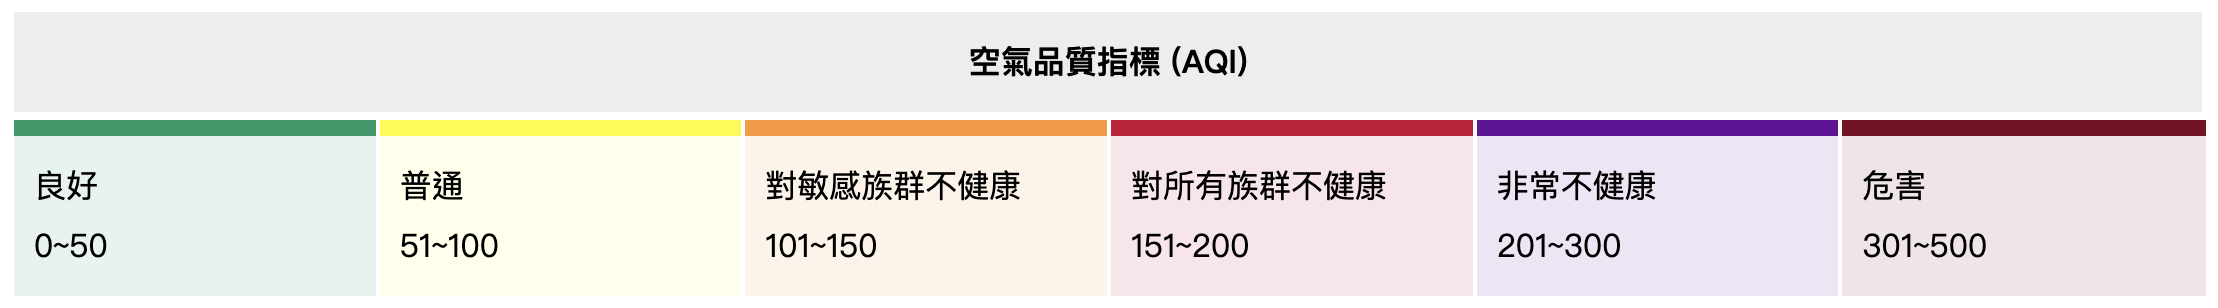

In [57]:
# for site in aqdata:

    
    
    
    
    
    
    
    
    # print(site["SiteName"], site["AQI"], site["Quality"])


二林 66 普通
三重 28 良好
三義 36 良好
土城 13 良好
士林 20 良好
大同 39 良好
大里 57 普通
大園 23 良好
大寮 84 普通
小港 76 普通
中山 18 良好
中壢 20 良好
仁武 78 普通
斗六 57 普通
冬山 13 良好
古亭 14 良好
左營 65 普通
平鎮 15 良好
永和 19 良好
安南 62 普通
朴子 67 普通
汐止 13 良好
竹山 43 良好
竹東 29 良好
西屯 59 普通
沙鹿 43 良好
宜蘭 13 良好
忠明 54 普通
松山 14 良好
板橋 22 良好
林口 13 良好
林園 68 普通
花蓮 16 良好
金門 47 良好
前金 67 普通
前鎮 65 普通
南投 62 普通
屏東 79 普通
恆春 10 良好
美濃 67 普通
苗栗 21 良好
埔里 43 良好
桃園 19 良好
馬公 36 良好
馬祖 71 普通
基隆 17 良好
崙背 61 普通
淡水 17 良好
麥寮 54 普通
善化 67 普通
復興 61 普通
湖口 30 良好
菜寮 20 良好
陽明 18 良好
新竹 19 良好
新店 12 良好
新莊 21 良好
新港 71 普通
新營 60 普通
楠梓 70 普通
萬里 29 良好
萬華 12 良好
嘉義 71 普通
彰化 58 普通
臺西 62 普通
臺東 9 良好
臺南 66 普通
鳳山 73 普通
潮州 63 普通
線西 48 良好
橋頭 71 普通
頭份 13 良好
龍潭 13 良好
豐原 52 普通
關山 7 良好
觀音 54 普通
彰化(員林) 65 普通
高雄(湖內) 77 普通
臺南(麻豆) 58 普通
屏東(琉球) -1 Unknown
桃園(三民) 18 良好
新北(樹林) 20 良好
臺南(學甲) 51 普通
屏東(枋寮) 47 良好
富貴角 34 良好
大城 66 普通


### (Option) Rescale better

為了避免過多的if-elif-else或者switch的使用，可以先把scale和category寫成兩個List，然後用多一層for-loop來trace該value會落在List的哪個區間。
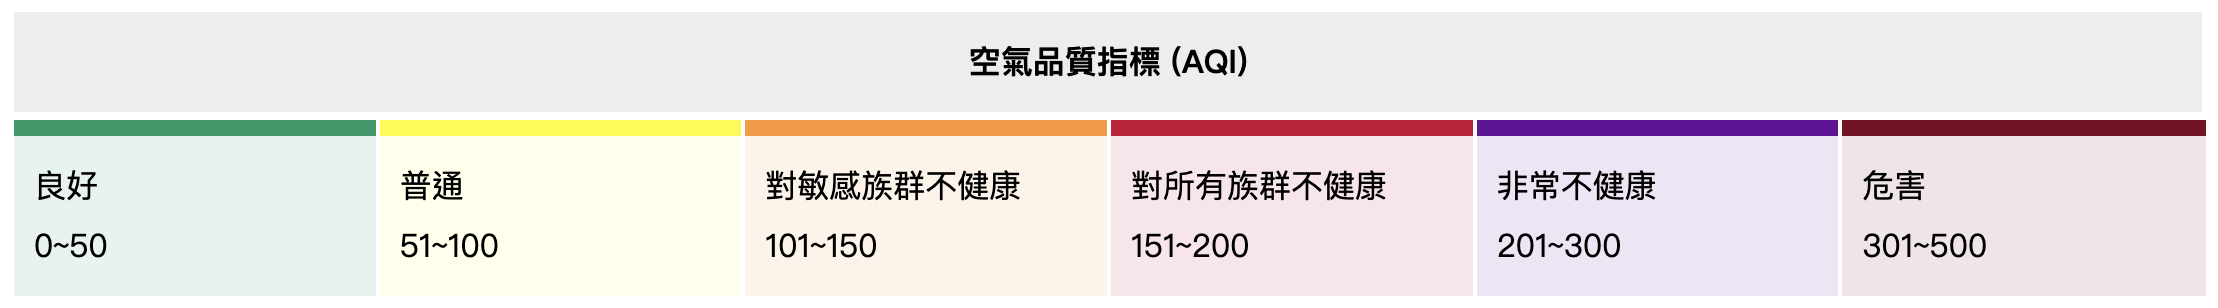

In [77]:
degree = ["Unknown", "良好", "普通", "對敏感族群不健康", "對所有族群不健康", "非常不健康", "危害"]
scaler = [-1, 50, 100, 150, 200, 300, 1000]

sdict = {k:v for k, v in zip(scaler, degree)}
print(sdict)

# scaler = {-1:"Unknown", 50:"良好", 100:"普通", 150:"對敏感族群不健康", 200:"對所有族群不健康", 300:"非常不健康", 1000:"危害"}








{-1: 'Unknown', 50: '良好', 100: '普通', 150: '對敏感族群不健康', 200: '對所有族群不健康', 300: '非常不健康', 1000: '危害'}
二林 66 普通 普通
三重 28 良好 良好
三義 36 良好 良好
土城 13 良好 良好
士林 20 良好 良好
大同 39 良好 良好
大里 57 普通 普通
大園 23 良好 良好
大寮 84 普通 普通
小港 76 普通 普通
中山 18 良好 良好
中壢 20 良好 良好
仁武 78 普通 普通
斗六 57 普通 普通
冬山 13 良好 良好
古亭 14 良好 良好
左營 65 普通 普通
平鎮 15 良好 良好
永和 19 良好 良好
安南 62 普通 普通
朴子 67 普通 普通
汐止 13 良好 良好
竹山 43 良好 良好
竹東 29 良好 良好
西屯 59 普通 普通
沙鹿 43 良好 良好
宜蘭 13 良好 良好
忠明 54 普通 普通
松山 14 良好 良好
板橋 22 良好 良好
林口 13 良好 良好
林園 68 普通 普通
花蓮 16 良好 良好
金門 47 良好 良好
前金 67 普通 普通
前鎮 65 普通 普通
南投 62 普通 普通
屏東 79 普通 普通
恆春 10 良好 良好
美濃 67 普通 普通
苗栗 21 良好 良好
埔里 43 良好 良好
桃園 19 良好 良好
馬公 36 良好 良好
馬祖 71 普通 普通
基隆 17 良好 良好
崙背 61 普通 普通
淡水 17 良好 良好
麥寮 54 普通 普通
善化 67 普通 普通
復興 61 普通 普通
湖口 30 良好 良好
菜寮 20 良好 良好
陽明 18 良好 良好
新竹 19 良好 良好
新店 12 良好 良好
新莊 21 良好 良好
新港 71 普通 普通
新營 60 普通 普通
楠梓 70 普通 普通
萬里 29 良好 良好
萬華 12 良好 良好
嘉義 71 普通 普通
彰化 58 普通 普通
臺西 62 普通 普通
臺東 9 良好 良好
臺南 66 普通 普通
鳳山 73 普通 普通
潮州 63 普通 普通
線西 48 良好 良好
橋頭 71 普通 普通
頭份 13 良好 良好
龍潭 13 良好 良好
豐原 52 普通 普通
關山 7 良好 良好
觀音 54

## Detect prominant data

有了這類的資料後，可以做出什麼樣的資料描述呢？通常第一個想到的分析方法就是找到最嚴重、最差、變化最劇烈的地區。以下這是個非常好的例子說明要如何運用`if`和`for`找出AQI最高的地區。在過程中，必須要注意，原本的資料的資料型態為何，甚至要注意，原本的資料是否有缺漏。

這個案例企圖找出AQI最高的是哪些站台，且把該站台列印出來。注意，要列印的是AQI最高的站台，而不是最高的AQI值；此外還要注意，AQI最高的站台可能不只一個（這時候該怎麼處理？）。


### Find the maximum

找到最大值或最小值的概念：就個人的邏輯思考一下，要怎麼找到一群數的最大值？解題邏輯：把第一個數先拿來當標準，之後確認過每個數，有沒有比這個數更大的，若有的話，最大值就代換成找到的那個數，沒有的話，那第一個數就是最大值。

In [80]:
# finding the maximum value


# mina, maxa = 100, 0



#     print maxa, a
# print(max_site, maxa)
# print(min_site, mina)




大寮 84
屏東(琉球) -1


### Use built-in functions

這類比較大小的簡單功能一定都有人幫忙寫好了（如以下的例子），只要記得使用它就好。但是，要記得這樣的函式其實就是透過類似上述方法來比較大小以找到最大值。

In [88]:
alist = [5, 3, 2, 4, 1, 3, 2, 4, 7, 82, 19, 23, 42]
print(min(alist), max(alist), sum(alist), len(alist), float(sum(alist))/len(alist))


# sorted(aqlist, reverse = True)[0]


1 82 197 13 15.153846153846153
[66, 28, 36, 13, 20, 39, 57, 23, 84, 76, 18, 20, 78, 57, 13, 14, 65, 15, 19, 62, 67, 13, 43, 29, 59, 43, 13, 54, 14, 22, 13, 68, 16, 47, 67, 65, 62, 79, 10, 67, 21, 43, 19, 36, 71, 17, 61, 17, 54, 67, 61, 30, 20, 18, 19, 12, 21, 71, 60, 70, 29, 12, 71, 58, 62, 9, 66, 73, 63, 48, 71, 13, 13, 52, 7, 54, 65, 77, 58, -1, 18, 20, 51, 47, 34, 66]
大寮 84


84

### Find top n

前面的例子是只要找最大值，所以只需要用一個變數來存放最大值。但現在的任務如果是要找到前n大，那就必須要有n個變數來儲存。往往實用上這個n還常常開放給使用者自行輸入，必須是可變動的。那最好的解決方法就是，乾脆把所有數值由大到小排列好，放在一個List裡面，然後看看要取前n大，就用List Slicing取出前面n個數值。

#### Sorted by `sorted` function

1. 開一個空的List，用For將所有資料走訪一遍，把所有的AQI的值給`append()`在該List中。
2. 存起來以後，我用`sorted()`這個函式把這些值做排序。

In [89]:
## Use a list to store all PM2.5 value

aqlist = []
for site in aqdata:
    aqlist.append(int(site["AQI"]))
print(aqlist)





        
## sort the list by sorted()




[66, 28, 36, 13, 20, 39, 57, 23, 84, 76, 18, 20, 78, 57, 13, 14, 65, 15, 19, 62, 67, 13, 43, 29, 59, 43, 13, 54, 14, 22, 13, 68, 16, 47, 67, 65, 62, 79, 10, 67, 21, 43, 19, 36, 71, 17, 61, 17, 54, 67, 61, 30, 20, 18, 19, 12, 21, 71, 60, 70, 29, 12, 71, 58, 62, 9, 66, 73, 63, 48, 71, 13, 13, 52, 7, 54, 65, 77, 58, -1, 18, 20, 51, 47, 34, 66]
大寮 84
小港 76
仁武 78
屏東 79
高雄(湖內) 77


### (Practice) Print out the site which values are larger than the first quarter

有了排序後的List，就可以很方便地取一個閾值把要的資料取出來（最大值、前四分之一大的值或者是前三大的值），例如把大於該閾值的站台都給列印出來，即為所求。

二林 66
大寮 84
小港 76
仁武 78
左營 65
朴子 67
林園 68
前金 67
前鎮 65
屏東 79
美濃 67
馬祖 71
善化 67
新港 71
楠梓 70
嘉義 71
臺南 66
鳳山 73
橋頭 71
彰化(員林) 65
高雄(湖內) 77
大城 66


### (Practice) Print out sites with top 3 serious values

取出Top-3的範例

In [5]:
print(sorted(aqlist, reverse=True)[3])
for site in aqdata:
    if int(site['AQI']) >= aqlist[2]:
        print(site['SiteName'], site['AQI'])

103
金門 126
馬公 115
馬祖 122


#### (Option) By comperhensive style

In [91]:
aqlist = sorted([int(site['AQI']) for site in aqdata], reverse=True)
[(site['SiteName'], site['AQI']) for site in aqdata if int(site['AQI']) >= aqlist[2]]

[('大寮', '84'), ('仁武', '78'), ('屏東', '79')]

### (Option) Sorting Algorithm by hand

前例用了一個`sorted`函式就排序了所有的AQI的值，那這類`sorted`的排序函式是怎麼寫的呢？排序邏輯可以有很多種，但最容易理解的一種可以用兩層的排序演算法來達成。觀念很簡單：
1. 先抓住第一個，一一和後面比較，看看有沒有人比它大，有的話，就和後面做置換（Swap），沒有的話就不動，這樣跑過一輪，就可以保證第一個最大。
2. 接下來抓住第二個，一一和後面比較，看看有沒有人比它大，，有的話，就和後面做置換（Swap），沒有的話就不動，這樣跑過一輪，就可以保證第二個是次大的。
3. 依此類推。

Reference
1. https://www.geeksforgeeks.org/bubble-sort/
2. https://en.wikipedia.org/wiki/Bubble_sort


In [11]:
alist = [8, 3, 1, 3, 2, 4, 5]
alist = [8, 5, 1, 3, 2, 3, 4]
alist = [8, 5, 4, 1, 2, 3, 3]
alist = [8, 5, 4, 3, 1, 2, 3]
alist = [8, 5, 4, 3, 3, 1, 2]
alist = [8, 5, 4, 3, 3, 2, 1]

In [92]:
aqlist = []
site_list = []
for site in aqdata:x
    if site['AQI'] != "" or site['AQI'] != "ND":
        aqlist.append(int(site['AQI']))
        site_list.append(site['SiteName'])
        
for i in range(len(aqlist)):
    for j in range(i+1, len(aqlist)):
        if aqlist[i] < aqlist[j]:
            aqlist[i], aqlist[j] = aqlist[j], aqlist[i]

print(aqlist)

[84, 79, 78, 77, 76, 73, 71, 71, 71, 71, 70, 68, 67, 67, 67, 67, 66, 66, 66, 65, 65, 65, 63, 62, 62, 62, 61, 61, 60, 59, 58, 58, 57, 57, 54, 54, 54, 52, 51, 48, 47, 47, 43, 43, 43, 39, 36, 36, 34, 30, 29, 29, 28, 23, 22, 21, 21, 20, 20, 20, 20, 19, 19, 19, 18, 18, 18, 17, 17, 16, 15, 14, 14, 13, 13, 13, 13, 13, 13, 13, 12, 12, 10, 9, 7, -1]


## Convert data to dataframe

操作開放資料的時候，經常會為了方便處理，把資料轉成未來pandas可以處理的形式。而這樣的形式通常是list of dictionary。

### AQX data to pandas dataframe

In [18]:
import requests
import json
import pandas as pd
url = "https://airtw.epa.gov.tw/gis_ajax.aspx?Type=GetAQInfo&Layer=EPA&QueryTime=2022/09/24%2012:00"
aqdata = requests.get(url).json()
pd.DataFrame(aqdata)

,SiteID,SiteName,AQI,ViewName,AreaName,AreaID,COUNTY_Eng,POLLUTANT,SiteAddres,TWD97_Lon,TWD97_Lat,SiteType,SiteType2,siteowner
0,1,二林,61,二林,中部空品區,3,Changhua,臭氧八小時,彰化縣二林鎮萬合里江山巷1號,120.409653,23.925175,一般站,中央政府,行政院環境保護署
1,2,三重,53,三重,北部空品區,1,Newtaipei,二氧化氮,新北市三重區三和路重陽路交口,121.493806,25.072611,交通站,中央政府,行政院環境保護署
2,3,三義,61,三義,竹苗空品區,2,Miaoli,臭氧八小時,苗栗縣三義鄉西湖村上湖61-1號,120.758833,24.382942,一般站,中央政府,行政院環境保護署
3,4,土城,46,土城,北部空品區,1,Newtaipei,,新北市土城區學府路一段241號,121.451861,24.982528,一般站,中央政府,行政院環境保護署
4,5,士林,45,士林,北部空品區,1,Taipei,,臺北市北投區文林北路77號,121.516664,25.103340,一般站,中央政府,行政院環境保護署
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,91,新北(樹林),49,新北(樹林),北部空品區,1,Newtaipei,,新北市樹林區學勤路555號,121.383528,24.949028,行動站,中央政府,行政院環境保護署
82,92,臺南(學甲),47,臺南(學甲),雲嘉南空品區,4,Tainan,,726台南市學甲區華宗路540號,120.183397,23.236881,行動站,中央政府,行政院環境保護署
83,93,屏東(枋寮),34,屏東(枋寮),高屏空品區,5,Pingtung,,屏東縣枋寮鄉建興路39號,120.590369,22.384742,行動站,中央政府,行政院環境保護署
84,96,富貴角,93,富貴角,北部空品區,1,Newtaipei,臭氧八小時,,121.547380,25.292280,背景站,中央政府,行政院環境保護署


### Youbike data to pandas dataframe

Youbike的原始資料為dict-of-dict的型態，所以需要轉為list-of-dict比較好轉成pandas的dataframe。

In [20]:
import requests
import json
response = requests.get('https://tcgbusfs.blob.core.windows.net/blobyoubike/YouBikeTP.gz')
data = response.json()

#### Problematic by converting directly

- 如果直接用`pd.Dataframe`轉dict-of-dict會出現什麼狀況呢？
- 結果是dict的key，也就是Youbike站的id，變成dataframe的欄。看似好像就是個表格，應該可以用，但實際上這違背了原本dataframe的設計。這類sheet-like的設計，無論是EXCEL、Google sheet、R、Python、Stata、SPSS的想法都一樣，資料直欄（Column)就是不同的變數，而資料橫列（Row）就是每筆資料。
- 以Youbike資料來說，每筆資料就應該是每個站台的資料，所以應該擺在資料列，而sno、sname、tot、sbi等變數，就應該擺在資料欄。


In [21]:
pd.DataFrame(data['retVal'])

,0001,0002,0004,0005,0006,0007,0008,0009,0010,0011,...,0395,0396,0397,0398,0400,0401,0402,0403,0404,0405
sno,0001,0002,0004,0005,0006,0007,0008,0009,0010,0011,...,0395,0396,0397,0398,0400,0401,0402,0403,0404,0405
sna,捷運市政府站(3號出口),捷運國父紀念館站(2號出口),市民廣場,興雅國中,臺北南山廣場,信義廣場(台北101),世貿三館,松德站,台北市災害應變中心,三張犁,...,安強公園,新東街51巷口,劍潭海外青年活動中心,聯合醫院陽明院區,和平敦化路口,南京新生路口,下灣公園,捷運內湖站(1號出口),民族延平路口,捷運科技大樓站(台北教育大學)
tot,88,16,32,32,54,40,32,20,36,16,...,10,12,26,24,12,16,12,10,10,46
sbi,0,0,20,1,0,0,0,19,30,11,...,10,6,6,7,2,15,4,0,7,6
sarea,信義區,大安區,信義區,信義區,信義區,信義區,信義區,信義區,信義區,信義區,...,信義區,松山區,士林區,士林區,大安區,中山區,內湖區,內湖區,大同區,大安區
mday,20220926223425,20220926223418,20220926223443,20220926223442,20220926223440,20220926223441,20220926223415,20220926223426,20220926223416,20220926223432,...,20220926223343,20220926223420,20220926223442,20220926223441,20220926223433,20220926223432,20220926223427,20220926223436,20220926223429,20220926223439
lat,25.0408578889,25.041254,25.0360361111,25.0365638889,25.034047,25.0330388889,25.0352138889,25.031785,25.0286611111,25.034937,...,25.036844,25.061501,25.079603,25.104546,25.024440,25.051944,25.065159,25.083868,25.068653,25.024685
lng,121.567904444,121.55742,121.562325,121.5686639,121.565973,121.565619444,121.563688889,121.57448,121.566116667,121.55762,...,121.575413,121.563318,121.523700,121.531949,121.549076,121.527661,121.595611,121.593929,121.510569,121.544156
ar,忠孝東路/松仁路(東南側),忠孝東路四段/光復南路口(西南側),市府路/松壽路(西北側)(鄰近台北101/台北世界貿易中心/台北探索館),松仁路/松仁路95巷(東南側)(鄰近信義商圈/台北信義威秀影城),松智路/松廉路(東北側) (鄰近台北101/信義商圈/台北信義威秀影城),松智路/信義路(東北側) (鄰近台北101),市府路/松壽路(東南側) (鄰近台北101/台北世界貿易中心/台北探索館),台北市信義區松德路300號,台北市信義區莊敬路391巷11弄2號,光復南路/基隆路一段364巷(鄰近大安親子館),...,虎林街212巷58號(西南側),三民路 / 新東街51巷口(東側)(鄰近松山親子館),通河街 / 通河街2巷(南側)(鄰近圓山大飯店/劍潭公園)(鄰近芝山岩/芝山巖惠濟宮/芝山文...,雨聲街105號(南側),和平東路三段 / 敦化南路二段口(東側),新生北路一段 / 南京東路一段口(橋墩下方)(鄰近林森公園/康樂公園),民權東路六段206巷 / 民權東路六段190巷75弄口,成功路四段182巷 / 成功路四段182巷6弄口(東南側),民族西路 310 號前方,和平東路二段134號(前方)
sareaen,Xinyi Dist.,Daan Dist.,Xinyi Dist.,Xinyi Dist.,Xinyi Dist.,Xinyi Dist.,Xinyi Dist.,Xinyi Dist.,Xinyi Dist.,Xinyi Dist.,...,Xinyi Dist.,Songshan Dist.,Shilin Dist.,Shilin Dist.,Daan Dist.,Zhongshan Dist.,Neihu Dist.,Neihu Dist.,Datong Dist.,Daan Dist.


#### Solution One: Convert data structure

仿照AQX的資料結構，在讀取資料後，先開一個空的`site_list`，然後一一把讀到的每個dict用`append()`一一放到list中。
最後在用`pd.DataFrame(list_of_dict)`來轉換成dataframe。

In [22]:
site_list = []

for k, v in data['retVal'].items():
    site_list.append(v)

for site in site_list[:3]:
    print(site)
    print("-"*80)

{'sno': '0001', 'sna': '捷運市政府站(3號出口)', 'tot': '88', 'sbi': '0', 'sarea': '信義區', 'mday': '20220926223425', 'lat': '25.0408578889', 'lng': '121.567904444', 'ar': '忠孝東路/松仁路(東南側)', 'sareaen': 'Xinyi Dist.', 'snaen': 'MRT Taipei City Hall Stataion(Exit 3)-2', 'aren': 'The S.W. side of Road Zhongxiao East Road & Road Chung Yan.', 'bemp': '84', 'act': '1'}
--------------------------------------------------------------------------------
{'sno': '0002', 'sna': '捷運國父紀念館站(2號出口)', 'tot': '16', 'sbi': '0', 'sarea': '大安區', 'mday': '20220926223418', 'lat': '25.041254', 'lng': '121.55742', 'ar': '忠孝東路四段/光復南路口(西南側)', 'sareaen': 'Daan Dist.', 'snaen': 'MRT S.Y.S Memorial Hall Stataion(Exit 2.)', 'aren': 'Sec,4. Zhongxiao E.Rd/GuangFu S. Rd', 'bemp': '16', 'act': '1'}
--------------------------------------------------------------------------------
{'sno': '0004', 'sna': '市民廣場', 'tot': '32', 'sbi': '20', 'sarea': '信義區', 'mday': '20220926223443', 'lat': '25.0360361111', 'lng': '121.562325', 'ar': '市府路/松壽路(

最後一個步驟就是用`pd.DataFrame()`將其轉成pandas dataframe。

In [23]:
import pandas as pd
pd.DataFrame(site_list)

,sno,sna,tot,sbi,sarea,mday,lat,lng,ar,sareaen,snaen,aren,bemp,act
0,0001,捷運市政府站(3號出口),88,0,信義區,20220926223425,25.0408578889,121.567904444,忠孝東路/松仁路(東南側),Xinyi Dist.,MRT Taipei City Hall Stataion(Exit 3)-2,The S.W. side of Road Zhongxiao East Road & Ro...,84,1
1,0002,捷運國父紀念館站(2號出口),16,0,大安區,20220926223418,25.041254,121.55742,忠孝東路四段/光復南路口(西南側),Daan Dist.,MRT S.Y.S Memorial Hall Stataion(Exit 2.),"Sec,4. Zhongxiao E.Rd/GuangFu S. Rd",16,1
2,0004,市民廣場,32,20,信義區,20220926223443,25.0360361111,121.562325,市府路/松壽路(西北側)(鄰近台北101/台北世界貿易中心/台北探索館),Xinyi Dist.,Citizen Square,The N.W. side of Road Shifu & Road Song Shou.,12,1
3,0005,興雅國中,32,1,信義區,20220926223442,25.0365638889,121.5686639,松仁路/松仁路95巷(東南側)(鄰近信義商圈/台北信義威秀影城),Xinyi Dist.,Xingya Jr. High School,"The S.E. side of Road Songren & Ln. 95, Songre...",31,1
4,0006,臺北南山廣場,54,0,信義區,20220926223440,25.034047,121.565973,松智路/松廉路(東北側) (鄰近台北101/信義商圈/台北信義威秀影城),Xinyi Dist.,NAN SHAN PLAZA,The N.E. side of Road Song Zhi & Road Song Lian.,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,0401,南京新生路口,16,15,中山區,20220926223432,25.051944,121.527661,新生北路一段 / 南京東路一段口(橋墩下方)(鄰近林森公園/康樂公園),Zhongshan Dist.,Nanjing & Xinsheng Intersection,"Sec. 1, Xinsheng N. Rd. / Sec. 1, Nanjing E. Rd.",1,1
367,0402,下灣公園,12,4,內湖區,20220926223427,25.065159,121.595611,民權東路六段206巷 / 民權東路六段190巷75弄口,Neihu Dist.,Siawan Park,"Ln. 206, Sec. 6, Minquan E. Rd. / Aly. 75, Ln....",8,1
368,0403,捷運內湖站(1號出口),10,0,內湖區,20220926223436,25.083868,121.593929,成功路四段182巷 / 成功路四段182巷6弄口(東南側),Neihu Dist.,MRT Neihu Sta.1(Exit.1),"Ln. 182, Sec. 4, Chenggong Rd. / Aly. 6, Ln. 1...",10,1
369,0404,民族延平路口,10,7,大同區,20220926223429,25.068653,121.510569,民族西路 310 號前方,Datong Dist.,Minzu & Yanping Intersection,"No.310, Minzu W. Rd.",3,1


#### (Good) Use `values()` to retrive all values

In [24]:
pd.DataFrame(data['retVal'].values())

,sno,sna,tot,sbi,sarea,mday,lat,lng,ar,sareaen,snaen,aren,bemp,act
0,0001,捷運市政府站(3號出口),88,0,信義區,20220926223425,25.0408578889,121.567904444,忠孝東路/松仁路(東南側),Xinyi Dist.,MRT Taipei City Hall Stataion(Exit 3)-2,The S.W. side of Road Zhongxiao East Road & Ro...,84,1
1,0002,捷運國父紀念館站(2號出口),16,0,大安區,20220926223418,25.041254,121.55742,忠孝東路四段/光復南路口(西南側),Daan Dist.,MRT S.Y.S Memorial Hall Stataion(Exit 2.),"Sec,4. Zhongxiao E.Rd/GuangFu S. Rd",16,1
2,0004,市民廣場,32,20,信義區,20220926223443,25.0360361111,121.562325,市府路/松壽路(西北側)(鄰近台北101/台北世界貿易中心/台北探索館),Xinyi Dist.,Citizen Square,The N.W. side of Road Shifu & Road Song Shou.,12,1
3,0005,興雅國中,32,1,信義區,20220926223442,25.0365638889,121.5686639,松仁路/松仁路95巷(東南側)(鄰近信義商圈/台北信義威秀影城),Xinyi Dist.,Xingya Jr. High School,"The S.E. side of Road Songren & Ln. 95, Songre...",31,1
4,0006,臺北南山廣場,54,0,信義區,20220926223440,25.034047,121.565973,松智路/松廉路(東北側) (鄰近台北101/信義商圈/台北信義威秀影城),Xinyi Dist.,NAN SHAN PLAZA,The N.E. side of Road Song Zhi & Road Song Lian.,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366,0401,南京新生路口,16,15,中山區,20220926223432,25.051944,121.527661,新生北路一段 / 南京東路一段口(橋墩下方)(鄰近林森公園/康樂公園),Zhongshan Dist.,Nanjing & Xinsheng Intersection,"Sec. 1, Xinsheng N. Rd. / Sec. 1, Nanjing E. Rd.",1,1
367,0402,下灣公園,12,4,內湖區,20220926223427,25.065159,121.595611,民權東路六段206巷 / 民權東路六段190巷75弄口,Neihu Dist.,Siawan Park,"Ln. 206, Sec. 6, Minquan E. Rd. / Aly. 75, Ln....",8,1
368,0403,捷運內湖站(1號出口),10,0,內湖區,20220926223436,25.083868,121.593929,成功路四段182巷 / 成功路四段182巷6弄口(東南側),Neihu Dist.,MRT Neihu Sta.1(Exit.1),"Ln. 182, Sec. 4, Chenggong Rd. / Aly. 6, Ln. 1...",10,1
369,0404,民族延平路口,10,7,大同區,20220926223429,25.068653,121.510569,民族西路 310 號前方,Datong Dist.,Minzu & Yanping Intersection,"No.310, Minzu W. Rd.",3,1
